<h3>IMAGE SEGMENTATION OF HANDWRITTEN ARITHMETIC EXPRESSIONS USING OPENCV</h3>

Link to the GitHub repository: https://github.com/AgVicCodes/Machine_Learning_Project

Dataset: https://www.kaggle.com/datasets/sarunpakkkkkk/handwritten-math-symbols-dataset

In this project, I'll walk you through image segmentation of handwritten mathematical expressions.

Note that prerequisite knowledge of CNN model training is helpful but not necessary as I have already trained and saved the model for your usage on github.

The code for the model generation and training is provided in the solving_mathematical_expressions.ipynb file.

Also, the handwritten arithmetic expressions are totally generated using code, as provided in the binary_operations_lstm.ipynb file.

In [1]:
# pip install opencv-python==4.5.5.64 opencv-python-headless==4.5.5.64

In [24]:
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.config import list_physical_devices

In [25]:
gpus = list_physical_devices('GPU')

for gpu in gpus:
    print(f'Name: {gpu.name}')
    print(f'Type: {gpu.device_type}')

Name: /physical_device:GPU:0
Type: GPU


In [89]:
image_path = 'images/img.png'
image_dir = 'images'

assert os.path.exists(image_path)

In [90]:
def preprocess_image_for_segmentation(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (800, 800))
    _, binary_image = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY_INV)

    return image, binary_image

In [91]:
def segment_image(binary_image, min_contour_size = 10):
    
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Contours detected: {len(contours)}")
    bounding_boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > min_contour_size]
    
    return bounding_boxes

In [92]:
def draw_contours(image, contours):
    return cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

In [93]:
def extract_segments(image, bounding_boxes, target_size = (28, 28)):
    segments = []
    for (x, y, w, h) in bounding_boxes:
        segment = image[y:y+h, x:x+w]
        segment = cv2.resize(segment, target_size)
        segments.append(segment)

    return segments

In [94]:
original_image, binary_image = preprocess_image_for_segmentation(image_path)
cv2.imwrite('images/binary_image_output.png', binary_image)
print("Binary image saved!")

Binary image saved!


In [95]:
bounding_boxes = segment_image(binary_image)
print(f"Detected {len(bounding_boxes)} segments.")

Contours detected: 5
Detected 5 segments.


In [96]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = draw_contours(original_image.copy(), contours)
cv2.imwrite('images/ContoursImage.png', image_with_contours)

True

In [97]:
segments = extract_segments(original_image, bounding_boxes)
for i, segment in enumerate(segments[:5]):
    cv2.imwrite(f'images/segment_{i}.png', segment)

In [98]:
# import numpy as np

# def enhance_minus_sign(binary_image):
    
#     kernel = np.ones((2,2), np.uint8)
#     dilated = cv2.dilate(binary_image, kernel, iterations=2)
    
#     return dilated

# dilated_image = enhance_minus_sign(binary_image)

# cv2.imwrite('images/dilated_binary_image.png', dilated_image)
# print("Dilated binary image saved!")


Dilated binary image saved!


In [99]:
# bounding_boxes = segment_image(dilated_image)
# print(f"Detected {len(bounding_boxes)} segments after dilation.")

Contours detected: 5
Detected 5 segments after dilation.


In [100]:
# contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# image_with_contours = draw_contours(original_image.copy(), contours)
# cv2.imwrite('ContoursImage_dilated.png', image_with_contours)

# segments = extract_segments(original_image, bounding_boxes)
# for i, segment in enumerate(segments[:5]):
#     cv2.imwrite(f'images/segment_{i}.png', segment)


In [103]:
path = 'models'

num_recog_model = tf.keras.models.load_model(os.path.join(path, 'num_model.keras'))
sym_recog_model = tf.keras.models.load_model(os.path.join(path, 'sym_model_cp1.keras'))

2024-12-13 11:49:48.830394: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-13 11:49:48.831124: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-13 11:49:48.831156: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-13 11:49:48.831701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 11:49:48.832340: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [104]:
num_recog_model.summary()
sym_recog_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,103 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,069 (1.72 MB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 278, 278, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 92, 92, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 91, 91, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 44, 44, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 21, 21, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       204,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,003 (3.20 MB)

 Trainable params: 279,334 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 558,669 (2.13 MB)

In [105]:
sample_segment = segments[0]

sample_segment = sample_segment.astype('float32') / 255.0

sample_segment = np.expand_dims(sample_segment, axis=-1)
sample_segment = np.expand_dims(sample_segment, axis=0)

In [106]:
sample_segment.shape

(1, 28, 28, 1)

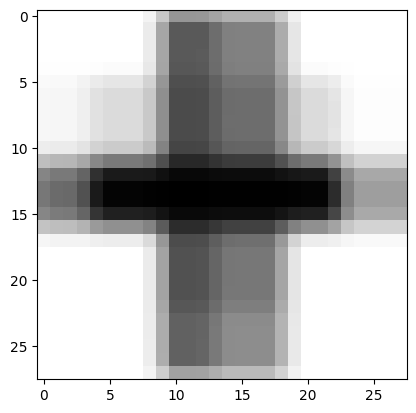

In [ ]:
plt.imshow(sample_segment.reshape(28, 28, 1), cmap = 'grey')

In [107]:
digit_prediction = num_recog_model.predict(sample_segment)
digit_class = np.argmax(digit_prediction)
print("Digit model prediction:", digit_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Digit model prediction: 5


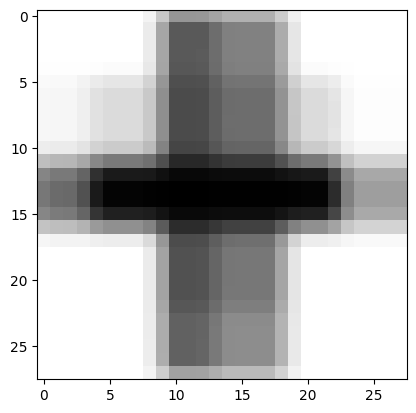

In [108]:
plt.imshow(sample_segment.reshape(28, 28), cmap = 'grey')